## Importing Libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
tf.__version__

'2.5.0'

## Data Preprocessing

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Building CNN

In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64,64,3]))

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training and Validating Data

In [13]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 79s 310ms/step - loss: 0.6697 - accuracy: 0.5824 - val_loss: 0.6254 - val_accuracy: 0.6200
Epoch 2/25
250/250 [==============================] - 85s 340ms/step - loss: 0.5999 - accuracy: 0.6758 - val_loss: 0.5736 - val_accuracy: 0.7005
Epoch 3/25
250/250 [==============================] - 85s 339ms/step - loss: 0.5660 - accuracy: 0.7046 - val_loss: 0.6050 - val_accuracy: 0.6820
Epoch 4/25
250/250 [==============================] - 86s 345ms/step - loss: 0.5368 - accuracy: 0.7266 - val_loss: 0.5273 - val_accuracy: 0.7360
Epoch 5/25
250/250 [==============================] - 103s 412ms/step - loss: 0.5083 - accuracy: 0.7489 - val_loss: 0.5343 - val_accuracy: 0.7335
Epoch 6/25
250/250 [==============================] - 75s 298ms/step - loss: 0.4911 - accuracy: 0.7595 - val_loss: 0.4862 - val_accuracy: 0.7705
Epoch 7/25
250/250 [==============================] - 72s 289ms/step - loss: 0.4806 - accuracy: 0.7681 - val_loss: 0.4743 - val_a

## Making Single Prediction

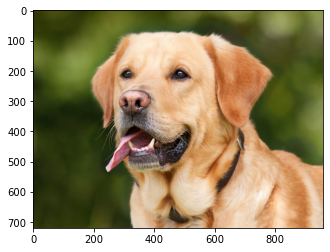

In [14]:
img_1 = cv2.imread('dataset/single_prediction/cat_or_dog_1.jpg')
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

In [15]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result [0][0] == 1:
    prediction = 'Dog'
else: 
    prediction = 'Cat'

In [16]:
print(prediction)

Dog


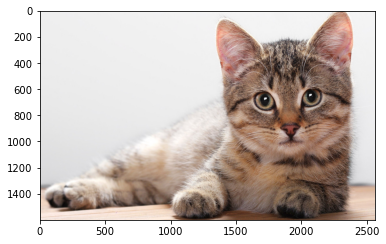

In [17]:
img_2 = cv2.imread('dataset/single_prediction/cat_or_dog_2.jpg')
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
plt.imshow(img_2)

In [18]:
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result [0][0] == 1:
    prediction = 'Dog'
else: 
    prediction = 'Cat'

In [19]:
print(prediction)

Cat
